# Graphs Examples

In [ ]:
# basic setup
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import pytz
import statsmodels.api as sm
import statsmodels.formula.api as smf
import string
import sys

## Basic Line Graph

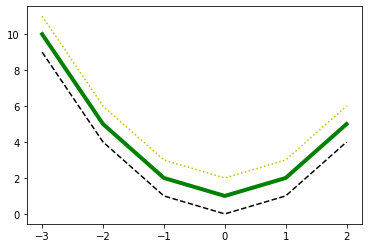

<Figure size 432x288 with 0 Axes>

In [4]:
xval = list(range(-3, 3))
y0val = [x ** 2 for x in xval]
y1val = [x ** 2 + 1 for x in xval]
y2val = [x ** 2 + 2 for x in xval]

# black dashed
plt.plot(xval, y0val, 'k--')
# thick green
plt.plot(xval, y1val, 'g', linewidth = 4)
# yellow dotted
plt.plot(xval, y2val, 'y:')
plt.show()
plt.clf()

## Legend Position - Alternative Position in Graph

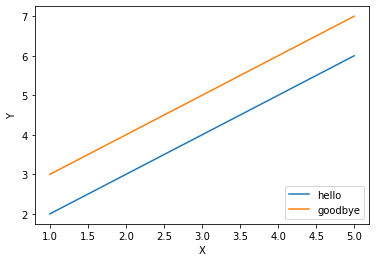

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 6], label = 'hello')
plt.plot([1, 2, 3, 4, 5], [3, 4, 5, 6, 7], label = 'goodbye')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right')
plt.show()
plt.clf()

## Legend Position - Below Graph

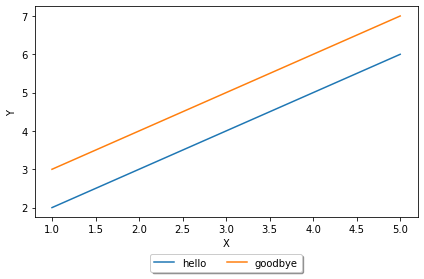

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 6], label = 'hello')
plt.plot([1, 2, 3, 4, 5], [3, 4, 5, 6, 7], label = 'goodbye')
# ncol determines number of columns in legend
# adjust y in bbox_to_anchor to move up and down
# fontsize argument not needed
fontsize = 10
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(prop = {'size': fontsize}, loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox = True, shadow = True, ncol = 2)
# need to adjust after bbox_to_anchor
plt.tight_layout()
plt.show()
plt.clf()

## Scatter Plot Setup

In [7]:
# get variables
np.random.seed(1)
x = np.random.normal(size = [100])
u = np.random.normal(size = [100])
desc = list(range(100))
y = x + u

dfscat = pd.DataFrame({'x': x, 'y': y, 'desc': desc})

## Scatter Plot Basic

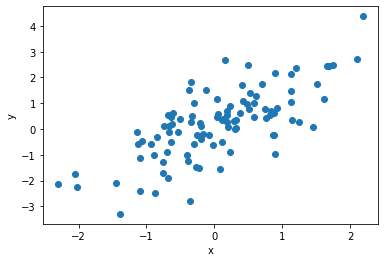

<Figure size 432x288 with 0 Axes>

In [8]:
# basic plot
xvar = 'x'
yvar = 'y'
plt.scatter(dfscat[xvar], dfscat[yvar])
plt.xlabel(xvar)
plt.ylabel(yvar)
# plt.savefig(LOCATION)
plt.show()
plt.clf()

## Scatter Plot with Line of Best Fit

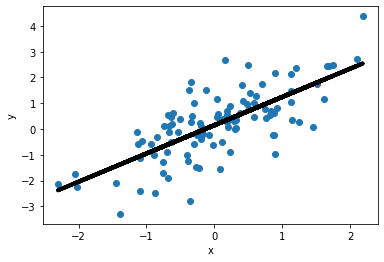

<Figure size 432x288 with 0 Axes>

In [9]:
# scatter with line of best fit
xvar = 'x'
yvar = 'y'

plt.scatter(dfscat[xvar], dfscat[yvar])
plt.xlabel(xvar)
plt.ylabel(yvar)

# line of best fit
x = dfscat[xvar].values
y = dfscat[yvar].values
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, 'k', linewidth = 4)

# plt.savefig(LOCATION)
plt.show()
plt.clf()

## Scatter Plot with Annotation

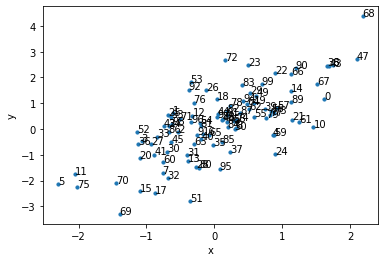

<Figure size 432x288 with 0 Axes>

In [10]:
# plot with annotated column
xvar = 'x'
yvar = 'y'
plt.scatter(dfscat[xvar], dfscat[yvar], s = 10)
plt.xlabel(xvar)
plt.ylabel(yvar)
# add annotation for each month
for i, txt in enumerate(dfscat['desc']):
    plt.annotate(txt, (dfscat[xvar][i], dfscat[yvar][i]), size = 10)
plt.show()
plt.clf()

## Local Projection Graph with Standard Error Bands

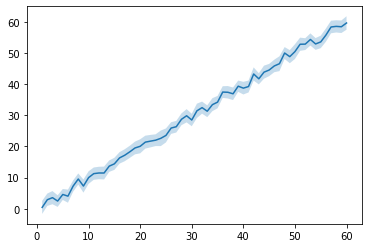

In [11]:
N = 100
coeffs = []
stds = []
years = list(range(1, 61))
for i in years:
    x_t = np.random.normal(size = N)
    u_t = np.random.normal(size = N, scale = 10)
    y_tpi = i * x_t + u_t

    dfscat = pd.DataFrame({'y_tpi': y_tpi, 'x_t': x_t})

    # model = sm.OLS(y_tpi, X, missing = 'drop').fit()
    model = smf.ols(formula = 'y_tpi ~ x_t', data = dfscat).fit()
    coeffs.append( model.params['x_t'] )
    stds.append( model.bse['x_t'] )

plt.plot(years, coeffs)
plt.fill_between(years, [coeffs[i] - 1.96 * stds[i] for i in range(len(years))], [coeffs[i] + 1.96 * stds[i] for i in range(len(years))], alpha = 0.25)

## Local Projection Graph with Confidence Interval Bands

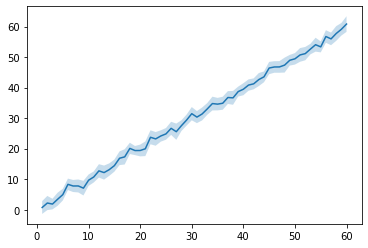

In [23]:
N = 100
coeffs = []
ucs = []
lcs = []
years = list(range(1, 61))
for i in years:
    x_t = np.random.normal(size = N)
    u_t = np.random.normal(size = N, scale = 10)
    y_tpi = i * x_t + u_t

    dfscat = pd.DataFrame({'y_tpi': y_tpi, 'x_t': x_t})

    # model = sm.OLS(y_tpi, X, missing = 'drop').fit()
    model = smf.ols(formula = 'y_tpi ~ x_t', data = dfscat).fit()
    coeffs.append( model.params['x_t'] )
    
    ucs.append( model.conf_int(alpha = 0.05).loc['x_t', 0] )
    lcs.append( model.conf_int(alpha = 0.05).loc['x_t', 1] )
 
plt.plot(years, coeffs)
plt.fill_between(years, lcs, ucs, alpha = 0.25)